In [ ]:
# 最近傍法 -> 機械学習においてクラスタリング（データの分類）に使われる手法の一つ。 
# ニアレストネイバー法ともいう。 

# 機械学習の7つの手順
# 1,問題定義 -> 一番大事, 機械学習 = 手段(予測,分類) -> 実社会の問題を解決するのが目標(使わなければ一番良い)
# 2,データ入手
# 3,データ理解
# 4,適切に加工
# 5,モデルを試す
# 6,最良のモデル選択及び微調整
# 7,稼働

# 2種類のデータを用意する
# 1,訓練データ -> モデルを構築するために用いるデータ集団
# 2,テストデータ -> モデルの精度を用いるデータ集団 (正しく分類,予測できているのか見るために大事)

# 多くの場合の割合 -> 75:25 or 80:20

# 回帰 -> 連続する数値データを予測,予測結果は線(直線,曲線)として出力される,線形回帰,サポートベクトルマシーン
# 分類 -> あるデータがどのグループに属するかを予測する,空間を分けるような出力結果,決定木、logistic回帰,K-means 

# 最近傍法 -> ある入力Xが与えられた時,その値に近いデータを予測値(近い人が予測値となる)とする手法
# k最近傍法 -> ある入力Xが与えられた時,それに最も近いk個のデータの平均を予測値とする,最も近いはユークリッド距離

#最近傍法

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 3.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4787dc92f38e5dcc98f50c520b8bd495d220c6219441f56e93042efb4a01ab26
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


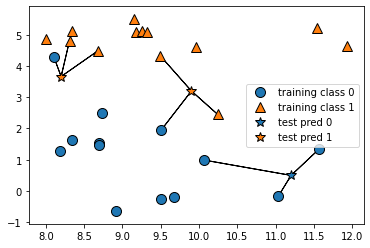

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3) #n_neighbors=3, 3つのグループに分ける

In [4]:
X,y = mglearn.datasets.make_forge() #make_forge() -> 二つの返り値があってそれをそれぞれX,y変数に代入している

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
X #Xの形, 予測の元になるデータ,説明変数

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [6]:
X.shape #(26, 2) -> 例 26人分の2種類(身長,体重)のデータ

(26, 2)

In [7]:
y #グループで分けられている,Xの実際の正解ラベル,目的変数

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

# データ可視化

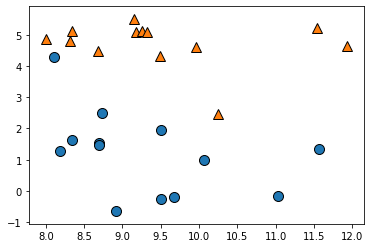

In [8]:
# 散布図
mglearn.discrete_scatter(X[:,0],X[:,1],y) #(横軸のデータ[行,列]、縦軸のデータ[行,列],正解ラベル) 
#これでグルーピングしてくれる
plt.show()

#最近傍法の手法を試す

In [9]:
#データ加工は欠損値や異常値がないため省略する
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #自動で訓練データとテストデータを分けてくれる

In [10]:
#訓練データとテストデータを分ける
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0) #分割したいデータを引数として取る(Xの分割,yの分割,random_state=0)
#random_state(乱数seed)=0 -> train_test_splitはランダムにデータを分けてくれるが、毎回同じ数字を返してくれる
#これを実行したらデータを分割してくれる

In [11]:
X_train

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [12]:
X_train.shape #19*2,xと数が減っている

(19, 2)

#最近傍法 実装

In [13]:
# モデル生成
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
# モデル学習
clf.fit(X_train,y_train) #訓練データで学習

KNeighborsClassifier(n_neighbors=3)

In [15]:
# 精度確認
clf.predict(X_test) #予測したいデータを入れる

array([1, 0, 1, 0, 1, 0, 0])

In [16]:
# ↑の実際の正解ラベル
y_test #綺麗に予測されている

array([1, 0, 1, 0, 1, 1, 0])

In [17]:
# 正しさの割合を出してくれる関数
clf.score(X_test,y_test) #(予測の元となるデータを入れる,その正解ラベル)
# 0.8571428571428571 -> 正解率

0.8571428571428571

In [18]:
#round ver
round(clf.score(X_test,y_test),3) #小数点第３まで 

0.857

In [42]:
#正規表現 ver
print("{:.2f}".format(clf.score(X_test,y_test)))
# {:.2f} -> 小数点以下2桁

0.86


#最良のモデル選択および微調整

In [20]:
# n_neighbors=10の場合
# モデル生成
clf_10 = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
clf_10.score(X_test,y_test)

# n_neighbors=10でも3でも変化なし

0.8571428571428571

In [21]:
# for文で1~15までをn_neighborsに入れてみて精度の確認

for n_neighbors in range(1,16):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    print("Test set accuracy:n_neighbors={},{:.2f}".format(n_neighbors,clf.score(X_test,y_test)))
    # print(f"Test set accuracy:n_neighbors={n_neighbors},{clf.score(X_test,y_test):.2f}")

# 今回はkにどの値を与えても精度が変わらない

Test set accuracy:n_neighbors=1,0.86
Test set accuracy:n_neighbors=2,0.86
Test set accuracy:n_neighbors=3,0.86
Test set accuracy:n_neighbors=4,0.86
Test set accuracy:n_neighbors=5,0.86
Test set accuracy:n_neighbors=6,0.86
Test set accuracy:n_neighbors=7,0.86
Test set accuracy:n_neighbors=8,0.86
Test set accuracy:n_neighbors=9,0.86
Test set accuracy:n_neighbors=10,0.86
Test set accuracy:n_neighbors=11,0.86
Test set accuracy:n_neighbors=12,0.86
Test set accuracy:n_neighbors=13,0.86
Test set accuracy:n_neighbors=14,0.86
Test set accuracy:n_neighbors=15,0.86


<!-- Kを変えることによる境界線の引かれ方を見る -->

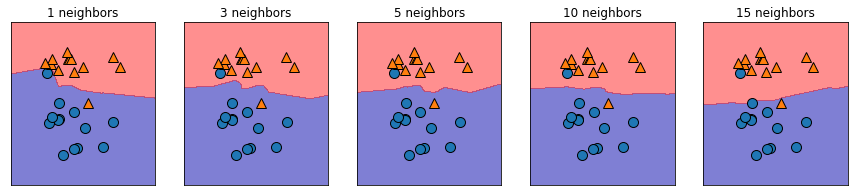

In [22]:
# kの値をそれぞれ変化させるとどのように境界線が変化するのか,分類のされかたに変化が出るのか確認
fig, axes = plt.subplots(1,5,figsize=(15,3)) #plt.subplots ->グラフを書くキャンバスを準備する関数(行,列,figsize=(適当に指定,適当に指定))
# fig, axesの関係性(インターネットブラウザのようなもの) -> fig=window, axes=タブ

for n_neighbors, ax in zip([1,3,5,10,15],axes): #まずは n_neighborsが1, axがaxes, in zip([1,3,5,10,15] -> 範囲
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train) 
    mglearn.plots.plot_2d_separator(clf,X,fill=True,ax=ax,alpha=0.5) #グラフを2次元を2つの領域に分割してくれる -> mglearn.plots.plot_2d_separator(分類のモデル(アルゴリズム),入力データ,fill=True(領域を2つに分割してくれる),ax=どの軸に書くのか,alpha=透明度)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) # 散布図描画 -> mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) 引数の処理をすべてグラフで適用している
    ax.set_title(f"{n_neighbors} neighbors") #タイトル指定

#　1~15までの境界線の変化を見る 
# neighborsの数が増えるほど境界線が滑らかになっていっている
# 分類できるところとできないところがあるのがわかる

# 実践的なデータで実践

In [23]:
from sklearn.datasets import load_breast_cancer

In [25]:
cancer = load_breast_cancer()ca

In [27]:
cancer #cancarにはdata,feature_names,target,target_namesという属性がある
cancer 

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [29]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
cancer.data.shape #データをイメージする,569人の30項目の変数

(569, 30)

In [33]:
cancer.feature_names #説明変数

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
cancer.target #目的変数

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

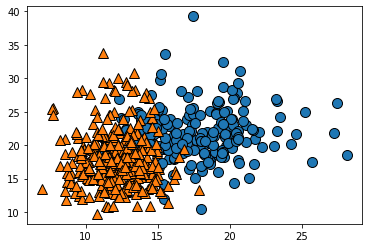

In [36]:
mglearn.discrete_scatter(cancer.data[:,0],cancer.data[:,1],cancer.target) #2つデータで散布図を作る
# 綺麗に分類されている

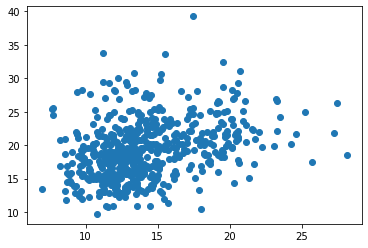

In [38]:
plt.scatter(cancer.data[:,0],cancer.data[:,1])
plt.show()

#ラベル付けされていないので散布図にした意味がない

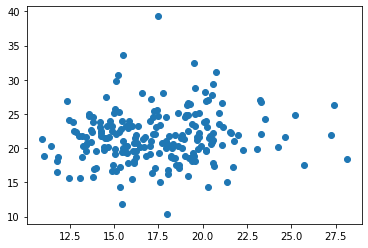

In [49]:
X_1_blue = cancer.data[:,0][cancer.target==0] #X_1 -> 横軸に取るデータ
X_2_blue = cancer.data[:,1][cancer.target==0] 
# 青色だけデータが取れる

plt.scatter(X_1_blue,X_2_blue)

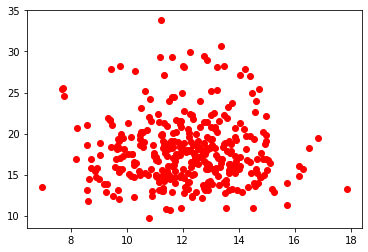

In [51]:
X_1_red = cancer.data[:,0][cancer.target==1] #X_1 -> 横軸に取るデータ
X_2_red = cancer.data[:,1][cancer.target==1] 
# オレンジだけデータが取れる

plt.scatter(X_1_red,X_2_red,c="red")

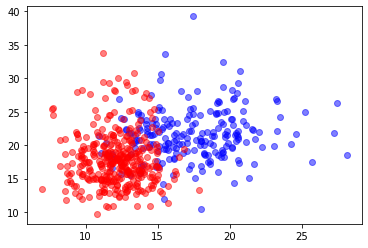

In [53]:
plt.scatter(X_1_blue,X_2_blue,c="blue",alpha=0.5)
plt.scatter(X_1_red,X_2_red,c="red",alpha=0.5)
# 大体同じ図

# モデルを試す

In [57]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0) #stratify=正しく学習させるために層化サンプリングをさせる,母集団の性質を保ったまま学習をする,引数には割合を保ちたいデータを指定する

In [60]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
clf.predict(X_test) #予測

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [61]:
y_test #正解

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [62]:
# 違いをわかりやすくする
clf.predict(X_test) == 
#大体Trueなのでいい感じに分割することができている

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,